In [1]:
import pandas as pd
import glob

df = pd.concat(map(pd.read_csv, glob.glob('./coronavirus-covid19-tweets/*2020-03-12 Coronavirus Tweets.CSV')))

In [2]:
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1237891051894996992,132225222,2020-03-12T00:00:00Z,SSalud_mx,¿Por qué #LavarteLasManos? Infórmate en el mic...,TweetDeck,NaN,NaN,NaN,False,...,62,NaN,NaN,NaN,632579,206,NaN,2010-04-12T16:53:45Z,True,es
1,1237891051312033792,37950212,2020-03-12T00:00:00Z,ThaiPBS,6 ข้อดีการใช้ #หน้ากากผ้า ทางเลือกคนไม่ป่วย \n...,TweetDeck,NaN,NaN,NaN,False,...,92,NaN,NaN,NaN,2786831,183,NaN,2009-05-05T15:48:26Z,True,th
2,1237891051261739009,15872418,2020-03-12T00:00:00Z,ABSCBNNews,Narito ang alert level na ginagamit ng Departm...,TweetDeck,NaN,NaN,NaN,False,...,103,NaN,NaN,NaN,6697909,1075,NaN,2008-08-16T10:09:33Z,True,tl
3,1237891051249184768,860252856829587457,2020-03-12T00:00:00Z,IMSS_SanLuis,"Con manos limpias, seguro estarás mejor. #Cinc...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,942,41,NaN,2017-05-04T22:00:38Z,False,es
4,1237891051903307778,92174767,2020-03-12T00:00:00Z,DZMMTeleRadyo,Tinanggihan ng ilang miyembro ng Kamara na isa...,TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,1336680,161,NaN,2009-11-24T02:03:16Z,True,tl


In [3]:
df = df[df["lang"]=="en"]

In [4]:
df['text'].head()

7     Watch this newly released video featuring a me...
8     60 positive cases of #Covid19 in India, says H...
9     UM medical historian @HowardMarkel says he doe...
11    This JAMA Insights article reviews care for th...
12    He beat the #coronavirus at age of101 \nhttps:...
Name: text, dtype: object

In [5]:
df.shape

(266973, 22)

In [6]:
# df_processed = df[['user_id','text']].groupby('user_id', as_index = False).agg({'text': 'sum'})

In [7]:
# df_processed.shape

In [8]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_tweet(text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # convert text to lower-case
    nopunc = nopunc.lower()
    # remove URLs
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', nopunc)
    nopunc = re.sub(r'http\S+', '', nopunc)
    # remove usernames
    nopunc = re.sub('@[^\s]+', '', nopunc)
    # remove the # in #hashtag
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc)
    #remove numbers
    nopunc = re.sub("^\d+\s|\s\d+\s|\s\d+$"," ", nopunc)
    nopunc = re.sub("\d", "", nopunc)
    # remove repeated characters
    nopunc = re.sub('(corona|covid|virus)', '', nopunc)
    nopunc = word_tokenize(nopunc)
#     return nopunc
    # remove stopwords from final word list
    [word for word in nopunc if word not in stopwords.words('english')]
    text = ' '.join([str(elem) for elem in nopunc]) + "\n"
    return text
#     f.write(' '.join([str(elem) for elem in nopunc]) + "\n")

In [9]:
# tweet = "RT @marcobonzanini: just an example! #coronavirus :D http://example.com #NLP 1000 p coron6a"
# print(preprocess_tweet(tweet))
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
7,1237891054600241152,3520752864,2020-03-12T00:00:00Z,Tokyo_gov,Watch this newly released video featuring a me...,TweetDeck,NaN,NaN,NaN,False,...,37,NaN,NaN,NaN,118670,16,NaN,2015-09-11T00:05:21Z,True,en
8,1237891054399115264,1056850669,2020-03-12T00:00:00Z,airnewsalerts,"60 positive cases of #Covid19 in India, says H...",TweetDeck,NaN,NaN,NaN,False,...,12,NaN,NaN,NaN,2236114,13,NaN,2013-01-03T04:15:45Z,True,en
9,1237891053988073473,794162328,2020-03-12T00:00:00Z,StatesideRadio,UM medical historian @HowardMarkel says he doe...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,3786,412,NaN,2012-08-31T16:08:32Z,False,en
11,1237891053686075392,38489678,2020-03-12T00:00:00Z,JAMA_current,This JAMA Insights article reviews care for th...,Sprinklr,NaN,NaN,NaN,False,...,135,NaN,NaN,NaN,335352,805,NaN,2009-05-07T18:45:39Z,True,en
12,1237891053627162625,824565311437410305,2020-03-12T00:00:00Z,ViralTabNews,He beat the #coronavirus at age of101 \nhttps:...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,86,529,NaN,2017-01-26T10:31:04Z,False,en


In [10]:
# with open('tweets1.txt', 'w', encoding="utf8") as f:
#     df.text.map(lambda x:preprocess_tweet(x, f))
df['clean_text'] = df.text.map(lambda x:preprocess_tweet(x))

In [11]:
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang,clean_text
7,1237891054600241152,3520752864,2020-03-12T00:00:00Z,Tokyo_gov,Watch this newly released video featuring a me...,TweetDeck,NaN,NaN,NaN,False,...,NaN,NaN,NaN,118670,16,NaN,2015-09-11T00:05:21Z,True,en,watch this newly released video featuring a me...
8,1237891054399115264,1056850669,2020-03-12T00:00:00Z,airnewsalerts,"60 positive cases of #Covid19 in India, says H...",TweetDeck,NaN,NaN,NaN,False,...,NaN,NaN,NaN,2236114,13,NaN,2013-01-03T04:15:45Z,True,en,positive cases of in india says health ministry\n
9,1237891053988073473,794162328,2020-03-12T00:00:00Z,StatesideRadio,UM medical historian @HowardMarkel says he doe...,TweetDeck,NaN,NaN,NaN,False,...,NaN,NaN,NaN,3786,412,NaN,2012-08-31T16:08:32Z,False,en,um medical historian howardmarkel says he does...
11,1237891053686075392,38489678,2020-03-12T00:00:00Z,JAMA_current,This JAMA Insights article reviews care for th...,Sprinklr,NaN,NaN,NaN,False,...,NaN,NaN,NaN,335352,805,NaN,2009-05-07T18:45:39Z,True,en,this jama insights article reviews care for th...
12,1237891053627162625,824565311437410305,2020-03-12T00:00:00Z,ViralTabNews,He beat the #coronavirus at age of101 \nhttps:...,TweetDeck,NaN,NaN,NaN,False,...,NaN,NaN,NaN,86,529,NaN,2017-01-26T10:31:04Z,False,en,he beat the at age of\n


In [12]:
from nltk.tokenize import TweetTokenizer

inputFolder = "./basilisk-master/out_stressed2/"
tokenizer = TweetTokenizer()
# punct = list(string.punctuation)
# stopwords_additional = ['coronavirus', 'covid19', 'covid-19', 'covid', 'covid_19', '19', 'corona']
# stopwords_list = stopwords.words('english') + punct + ['rt','via','...','…','’','—','—:','“'] + stopwords_additional
# print(stopwords_list)


def read_words(infile):
    words = []
    with open(infile, encoding='utf8') as f:
        for line in f.readlines():
            words.append(line.strip())
    return words

stress_words = read_words(inputFolder + "STRESSED-NS-diffScore.lexicon")            
relax_words = read_words(inputFolder + "NOT_STRESSED-NS-diffScore.lexicon")
# stress_words.extend(read_words(inputFolder + "sample-data/seeds/STRESSED"))

# stress_words = read_words(inputFolder + "sample-data/seeds/STRESSED")            
# relax_words = read_words(inputFolder + "sample-data/seeds/NOT_STRESSED")

# stress_words = ['stress']
# relax_words = ['relax']

# safe_words = read_words(safe_words_file)            
# hazard_words = read_words(hazard_words_file)

def process_tweets(text): 
#     count_safe = 0
#     count_hazard = 0
    count_stress = 0
    count_relax = 0
    text = text.lower()
#     count_stress = text.count('stress')
#     count_relax = text.count('relax')
    tokens = tokenizer.tokenize(text)
#     tokens = [tok for tok in tokens if tok not in stopwords_list and not tok.isdigit()]
#     for tok in tokens:
#         if tok in stress_words:
#             count_stress +=1
#         if tok in relax_words:
#             count_relax +=1
#     if count_stress > count_relax:
#         return 1
#     if count_relax > count_stress:
#         return 2
#     return 0
#     f.write(' '.join([str(elem) for elem in tokens]) + "\n")
#     print(tokens)
#     return count_safe, count_hazard

    for tok in tokens:
        if tok in stress_words:
            return 1
    return 0


def process_tweets_safe(text): 
    count_safe = 0
    count_hazard = 0
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    for tok in tokens:
        if tok in safe_words:
            count_safe +=1
    return count_safe

def process_tweets_hazard(text): 
    count_safe = 0
    count_hazard = 0
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    for tok in tokens:
        if tok in hazard_words:
            count_hazard +=1
    return count_hazard

# for text in df_temp['clean_text'][:100]:
# #     text = text.to_string(index=False)
#     count_safe, count_hazard = process_tweets(text)
# #     print("Safe count: {0}, Hazard count: {1}".format(count_safe, count_hazard))
    
# df_temp["count_safe"] = df_temp.clean_text.map(lambda x:process_tweets_safe(x))
# df_temp["count_hazard"] = df_temp.clean_text.map(lambda x:process_tweets_hazard(x))

# df_kmeans1 = df_temp[["count_safe","count_hazard"]]
# df_kmeans1.head()
# keyword_count_array = np.array(df_kmeans1)
# # px.scatter(df, x="Sentiment", y="Subjectivity",color="cluster_sentiment")
# n_cluster = 5
# pred = KMeans(n_clusters=n_cluster).fit_predict(keyword_count_array)

# # df_temp[['clean_text', 'count_safe', 'count_hazard']].head()
# df_temp["cluster_keyword_count"] = pred
# df_temp.head()


In [13]:
# df['stress_label'] = df.clean_text.map(lambda x:process_tweets(x))
df['stress_label2'] = df.clean_text.map(lambda x:process_tweets(x))

In [14]:
# df['stress_label_new'] = df.clean_text.map(lambda x:process_tweets(x))

In [15]:
# df.columns

In [16]:
# df[['clean_text', 'stress_label']].head()
# print(df[df['stress_label']==2][['clean_text', 'stress_label']]['clean_text'].values)

In [17]:
X_train_df = df[df['stress_label2']>1]
import tensorflow as tf
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
# cfg = tf.ConfigProto(allow_soft_placement=True )
# cfg.gpu_options.allow_growth = True
# with tf.Session(config=cfg) as session:
#     session.run([tf.global_variables_initializer(), tf.tables_initializer()])
#     message_embeddings = session.run(embed(X_train_df['clean_text'].values))
# #     message_embeddings = session.run(embed(list(user_tweets.values())))
# print(message_embeddings.shape)

In [19]:
def get_chunk(df):
    data = df["clean_text"].tolist()
    chunks_size = 500
    chunks = [data[x : x + chunks_size] for x in range(0, len(data), chunks_size)]
    print(len(chunks))
    return chunks

# chunks = get_chunk(df)



In [66]:
import tensorflow as tf
print(tf.__version__)
cfg = tf.compat.v1.ConfigProto(allow_soft_placement=True )
cfg.gpu_options.allow_growth = True

def get_embedding(chunks):
    message_embeddings = []
    with tf.Session(config=cfg) as session:
        for index, ck in enumerate(chunks):
            session.run([tf.global_variables_initializer(), tf.tables_initializer()])
            # if index == 1:
            #   break
#             message_embeddings.append(session.run(embed(ck)))
            message_embeddings.extend(session.run(embed(ck)))
            print("finished ", index)
            # message_embeddings = session.run(embed(list(user_tweets.values())))
    return message_embeddings
# message_embeddings = get_embedding(chunks)

1.15.0


In [21]:
print(len(df[df['stress_label2']==1]))
# print(len(df[df['stress_label2']==2]))

10955


In [22]:
chunks_stress = get_chunk(df[df['stress_label2']==1][:10000])
chunks_relax = get_chunk(df[df['stress_label2']==0][:10000])
stress_text_embeddings = get_embedding(chunks_stress)
relax_text_embeddings = get_embedding(chunks_relax)


20
20
finished  0
finished  1
finished  2
finished  3
finished  4
finished  5
finished  6
finished  7
finished  8
finished  9
finished  10
finished  11
finished  12
finished  13
finished  14
finished  15
finished  16
finished  17
finished  18
finished  19
finished  0
finished  1
finished  2
finished  3
finished  4
finished  5
finished  6
finished  7
finished  8
finished  9
finished  10
finished  11
finished  12
finished  13
finished  14
finished  15
finished  16
finished  17
finished  18
finished  19


In [24]:
import numpy as np
X = []
for embedding in stress_text_embeddings:  
    X.extend(embedding)
for embedding in relax_text_embeddings:  
    X.extend(embedding)
# relax_text_embeddings.shape
len(X)
X = np.asarray(X)

In [42]:
def get_text_embedding(text_list):
    with tf.Session(config=cfg) as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        return session.run(embed(text_list))

# stress_text_embeddings = get_text_embedding(df[df['stress_label_new']==1]['clean_text'].values)
# relax_text_embeddings = get_text_embedding(df[df['stress_label_new']==2]['clean_text'].values)



In [26]:
# print(stress_text_embeddings.shape)
# print(relax_text_embeddings.shape)
import random
from sklearn.model_selection import train_test_split
import numpy as np

# X = np.concatenate((stress_text_embeddings[:250], relax_text_embeddings[:250]), axis=0)
# X = stress_text_embeddings[:250]
# np.append(X, relax_text_embeddings[:250])
# y = np.ones((250,), dtype=int)
# np.append(y, np.zeros((250,), dtype=int))
ones = np.ones((10000,), dtype=int)
zeros = np.zeros((10000,), dtype=int)
y = np.concatenate((ones,zeros), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# X_val = np.concatenate((stress_text_embeddings, relax_text_embeddings), axis=0)
# y_val = np.concatenate((np.ones((len(stress_text_embeddings),), dtype=int),np.zeros((len(relax_text_embeddings),), dtype=int)), axis=0)
# c = list(zip(X_val, y_val))

# random.shuffle(c)

# X_val, y_val = zip(*c)
# X_val, _, y_val, _ = train_test_split(X_val, y_val, test_size=0, random_state=42, shuffle=True)

# stress_text_embeddings_labeled = [(embedding, 1) for embedding in stress_text_embeddings]
# relax_text_embeddings_labeled = [(embedding, 1) for embedding in relax_text_embeddings]
# text_embeddings_labeled = []
# text_embeddings_labeled.extend(stress_text_embeddings_labeled)
# text_embeddings_labeled.extend(relax_text_embeddings_labeled)
# # random.shuffle(text_embeddings_labeled)
# print(text_embeddings_labeled[:20])


(16000, 512)
(16000,)
(4000, 512)
(4000,)


In [31]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1,gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy for train: ", svc.score(X_train, y_train))
print("Accuracy for test: ", svc.score(X_test, y_test))
# print("Accuracy for stressed: ", svc.score(stress_text_embeddings, np.ones((len(stress_text_embeddings),), dtype=int)))
# print("Accuracy for relaxed: ", svc.score(relax_text_embeddings, np.zeros((len(relax_text_embeddings),), dtype=int)))
# print("Accuracy for mixed: ", svc.score(X_val, y_val))




# svclassifier = SVC(C=10, probability=True, gamma='scale', kernel='linear')
# X_train, X_test, y_train, y_test =   cross_validation.train_test_split(iris.data,   iris.target, test_size=0.10, random_state=111)

Accuracy for train:  0.8668125
Accuracy for test:  0.853


In [32]:
from sklearn import svm

svc = svm.SVC(kernel='rbf', C=1,gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy for train: ", svc.score(X_train, y_train))
print("Accuracy for test: ", svc.score(X_test, y_test))

Accuracy for train:  0.8218125
Accuracy for test:  0.81275


In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
print("Accuracy for train: ", lr.score(X_train, y_train))
print("Accuracy for test: ", lr.score(X_test, y_test))

Accuracy for train:  0.8620625
Accuracy for test:  0.851


In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(512,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=512)
results = model.evaluate(X_test, y_test)
results

# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# history = model.fit(partial_x_train,
#                     partial_y_train,
#                     epochs=20,
#                     batch_size=512,
#                     validation_data=(x_val, y_val))
# history_dict = history.history
# history_dict.keys()
# import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# # "bo" is for "blue dot"
# plt.plot(epochs, loss, 'bo', label='Training loss')
# # b is for "solid blue line"
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

Epoch 1/40
16000/16000 [==============================] - 1s 44us/step - loss: 0.6492 - accuracy: 0.7484
Epoch 2/40
16000/16000 [==============================] - 0s 7us/step - loss: 0.5480 - accuracy: 0.8203
Epoch 3/40
16000/16000 [==============================] - 0s 7us/step - loss: 0.4614 - accuracy: 0.8326
Epoch 4/40
16000/16000 [==============================] - 0s 7us/step - loss: 0.4026 - accuracy: 0.8421
Epoch 5/40
16000/16000 [==============================] - 0s 7us/step - loss: 0.3685 - accuracy: 0.8469
Epoch 6/40
16000/16000 [==============================] - 0s 7us/step - loss: 0.3507 - accuracy: 0.8525
Epoch 7/40
16000/16000 [==============================] - 0s 7us/step - loss: 0.3410 - accuracy: 0.8546
Epoch 8/40
16000/16000 [==============================] - 0s 7us/step - loss: 0.3345 - accuracy: 0.8587
Epoch 9/40
16000/16000 [==============================] - 0s 8us/step - loss: 0.3300 - accuracy: 0.8594
Epoch 10/40
16000/16000 [==============================] - 0s 7

[0.31398125213384626, 0.8690000176429749]

In [67]:
# y_pred = model.predict(get_text_embedding(df['clean_text'].values))
chunks = get_chunk(df[:50000])
text_embeddings = get_embedding(chunks)

100
finished  0
finished  1
finished  2
finished  3
finished  4
finished  5
finished  6
finished  7
finished  8
finished  9
finished  10
finished  11
finished  12
finished  13
finished  14
finished  15
finished  16
finished  17
finished  18
finished  19
finished  20
finished  21
finished  22
finished  23
finished  24
finished  25
finished  26
finished  27
finished  28
finished  29
finished  30
finished  31
finished  32
finished  33
finished  34
finished  35
finished  36
finished  37
finished  38
finished  39
finished  40
finished  41
finished  42
finished  43
finished  44
finished  45
finished  46
finished  47
finished  48
finished  49
finished  50
finished  51
finished  52
finished  53
finished  54
finished  55
finished  56
finished  57
finished  58
finished  59
finished  60
finished  61
finished  62
finished  63
finished  64
finished  65
finished  66
finished  67
finished  68
finished  69
finished  70
finished  71
finished  72
finished  73
finished  74
finished  75
finished  76
finis

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 50000 arrays: [array([[ 4.62627038e-02],
       [ 7.00597242e-02],
       [-7.79495686e-02],
       [-6.45305589e-02],
       [-7.07120821e-02],
       [ 2.29513142e-02],
       [-2.54532024e-02],
       [ 9.924741...

In [82]:
model.save('tweets_model1.h5')

In [84]:
len(df_labeled[df_labeled['predicted_prob']<0.5])

39668

In [72]:
X = np.asarray(text_embeddings)
X.shape
# y_pred = model.predict(text_embeddings)


(50000, 512)

In [79]:
# y_pred = model.predict(get_text_embedding(df[0]['clean_text'].values))
# y_pred.shape
y_pred = model.predict(X)
y_list = [pred[0] for pred in y_pred]
print(len(y_list))
df_labeled = df[:50000]
print(len(df_labeled))
df_labeled['predicted_prob'] = y_list
df_labeled.head()
print(df_labeled[df_labeled['predicted_prob']>0.5]['clean_text'].values[:50])
# y_list_stress = [pred[0] for pred in y_pred if pred[0]>]
# y_pred.tolist()

50000
50000


C:\Users\hchau\Anaconda3\envs\new_test\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['it shouldnt take a pandemic to move us in the direction of actually having an accessible society we spoke to disability activist beingcharisblog on how to protect highrisk populations during\n'
 'virtualschool and onlinelearning due to means a lot of time looking at screens i have enjoyed listening to audiobooks to take a break here are a few i have enjoyed bookstagram soraapp overdrivelibs isbangkok\n'
 'please we need a ubistimulus our daughter works in ap at the front door if walmart we are having her take a leave of absence because is town over and we worry not only for her health but her fathers my husband who has a bad heart\n'
 '📣 new podcast bubonic plague ghosts poveglia island amp london bridge on spreaker blackdeath bubonicplague panic ghost ghoststory haunted hauntedhouse londonbridge plague poveglia povegliaisland\n'
 'there is fuck all united about the united kingdom yall are stabbing each other for toilet rolls and hand sanitizer cant we just share it yano seen as tho 

In [131]:
# from collections import Counter 
# # wordcloud in python
# from wordcloud import WordCloud, STOPWORDS 
# import matplotlib.pyplot as plt

# import re 
# import string
# import nltk # preprocessing text
# from textblob import TextBlob

# wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100,colormap="Paired", background_color='black',)
# wordcloud.generate(str(df_labeled[df_labeled['predicted_prob']>0.5]['clean_text']))
# # declare our figure 
# plt.figure(figsize=(20,10))
# plt.title("Top words - tweets", fontsize=20,color='black')
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.tight_layout(pad=10)
# plt.show()

In [87]:
y_labels_list = []
for prob in y_list:
    if prob >= 0.5:
        y_labels_list.append(1)
    else:
        y_labels_list.append(0)
df_labeled['predicted_label'] = y_labels_list

df_labeled.head()


C:\Users\hchau\Anaconda3\envs\new_test\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,followers_count,friends_count,account_lang,account_created_at,verified,lang,clean_text,stress_label2,predicted_prob,predicted_label
7,1237891054600241152,3520752864,2020-03-12T00:00:00Z,Tokyo_gov,Watch this newly released video featuring a me...,TweetDeck,NaN,NaN,NaN,False,...,118670,16,NaN,2015-09-11T00:05:21Z,True,en,watch this newly released video featuring a me...,0,0.002749,0
8,1237891054399115264,1056850669,2020-03-12T00:00:00Z,airnewsalerts,"60 positive cases of #Covid19 in India, says H...",TweetDeck,NaN,NaN,NaN,False,...,2236114,13,NaN,2013-01-03T04:15:45Z,True,en,positive cases of in india says health ministry\n,0,0.107307,0
9,1237891053988073473,794162328,2020-03-12T00:00:00Z,StatesideRadio,UM medical historian @HowardMarkel says he doe...,TweetDeck,NaN,NaN,NaN,False,...,3786,412,NaN,2012-08-31T16:08:32Z,False,en,um medical historian howardmarkel says he does...,0,0.490252,0
11,1237891053686075392,38489678,2020-03-12T00:00:00Z,JAMA_current,This JAMA Insights article reviews care for th...,Sprinklr,NaN,NaN,NaN,False,...,335352,805,NaN,2009-05-07T18:45:39Z,True,en,this jama insights article reviews care for th...,0,0.044076,0
12,1237891053627162625,824565311437410305,2020-03-12T00:00:00Z,ViralTabNews,He beat the #coronavirus at age of101 \nhttps:...,TweetDeck,NaN,NaN,NaN,False,...,86,529,NaN,2017-01-26T10:31:04Z,False,en,he beat the at age of\n,0,0.011610,0


In [88]:
from sklearn.linear_model import LogisticRegression
lr_2 = LogisticRegression(random_state=0)
lr_2.fit(X, y_labels_list)
print("Accuracy for train: ", lr.score(X, y_labels_list))
# print("Accuracy for test: ", lr.score(X_test, y_test))


C:\Users\hchau\Anaconda3\envs\new_test\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for train:  0.90206


In [119]:
# lr_2.predict(embed("I am sad")
# y_pred2 = lr_2.predict_proba(get_text_embedding(["There is too much work and no time"]))
y_pred2 = lr_2.predict(X)
df_labeled['lr_label'] = y_pred2.tolist()
print(len(df_labeled[df_labeled['lr_label']==1]))
print(df_labeled[df_labeled['lr_label']==1]['text'].values)

# print(y_pred2.tolist())
# print(df_labeled['clean_text'].values[:21])
# df_labeled2 = df_labeled[:50000]
# print(len(df_labeled))
# df_labeled['predicted_prob'] = y_list
# df_labeled.head()
# print(df_labeled[df_labeled['predicted_prob']>0.5]['clean_text'].values[:50])
# y_list2 = [pred[0] for pred in y_pred2]


8772
["UM medical historian @HowardMarkel says he doesn't feel fearful about #COVID19. But he does think there's plenty to learn about how decisions are made in outbreaks.\n\nhttps://t.co/ZzOh8t2CDY"
 '"It shouldn\'t take a pandemic to move us in the direction of actually having an accessible society."\n\nWe spoke to disability activist @BeingCharisBlog on how to protect high-risk populations during #COVID19. https://t.co/4fXKVJXl0O'
 'Think about alternatives to shaking hands. #COVID19 https://t.co/ecN0JXCF0a'
 ...
 "When I read Trump was making an announcement tonight, I rushed out and panic shopped for groceries\n\nDriven purely by fear &amp; emotion, I realize now that I'll be eating as I did in college:\n\nRamen Noodles\nKraft Mac &amp; Cheese\nHot Dogs &amp; Beans\nGrilled Cheese\nEggs\n\n#CoronavirusPandemic"
 'TOM HANKS &amp; WIFE HAS CORONAVIRUS 😔 https://t.co/rG0uyt4RUU  #CoronaVirusUpdate #CancelEverything #pandemic #CoronavirusPandemic #Coronavid19 #coronavirus https://t.co

C:\Users\hchau\Anaconda3\envs\new_test\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [130]:
with open('stress_classified_tweets.txs', 'w', encoding="utf8") as f:
    for val in df_labeled[df_labeled['lr_label']==1]['text']:
        f.write(val +"\n")

In [48]:
print(df['clean_text'].values[:20])
print(y_pred)

['watch this newly released video featuring a message from tokyos governor koike on below\n'
 'positive cases of in india says health ministry\n'
 'um medical historian howardmarkel says he doesnt feel fearful about but he does think theres plenty to learn about how decisions are made in outbreaks\n'
 'this jama insights article reviews care for the most severely ill patients with disease including standards of management of ards preventing sarscov spread in health care settings and surge preparation\n'
 'he beat the at age of\n'
 'untnews professors were told wednesday to consider ways to bring their courses online spokespeople for other area schools said wednesday that theyre closely watching the spread of but had not made a decision to suspend classes\n'
 'today in the entertainment industry latenight tv will drop live audiences and the e gaming convention was canceled due to the outbreak more updates\n'
 'to help those in the foodservice and restaurant industry monitor prevent and 

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(len(X_train))
print("Accuracy for train: ", gnb.score(X_train, y_train))
print("Accuracy for test: ", gnb.score(X_test, y_test))
# y_pred = gnb.fit(X_train, y_train).predict(X_test)

16000
Accuracy for train:  0.8076875
Accuracy for test:  0.804


In [6]:
df_processed = df[:50000].copy()
df_processed = df_processed[df_processed["lang"] == "en"]
df_processed.shape

(37751, 22)

In [7]:
df_processed['pro_text'] = df_processed.apply(lambda row: preprocess_tweet(row['text']), axis = 1)

In [8]:
df_processed.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang,pro_text
7,1237891054600241152,3520752864,2020-03-12T00:00:00Z,Tokyo_gov,Watch this newly released video featuring a me...,TweetDeck,NaN,NaN,NaN,False,...,NaN,NaN,NaN,118670,16,NaN,2015-09-11T00:05:21Z,True,en,"[watch, this, newly, released, video, featurin..."
8,1237891054399115264,1056850669,2020-03-12T00:00:00Z,airnewsalerts,"60 positive cases of #Covid19 in India, says H...",TweetDeck,NaN,NaN,NaN,False,...,NaN,NaN,NaN,2236114,13,NaN,2013-01-03T04:15:45Z,True,en,"[positive, cases, of, in, india, says, health,..."
9,1237891053988073473,794162328,2020-03-12T00:00:00Z,StatesideRadio,UM medical historian @HowardMarkel says he doe...,TweetDeck,NaN,NaN,NaN,False,...,NaN,NaN,NaN,3786,412,NaN,2012-08-31T16:08:32Z,False,en,"[um, medical, historian, howardmarkel, says, h..."
11,1237891053686075392,38489678,2020-03-12T00:00:00Z,JAMA_current,This JAMA Insights article reviews care for th...,Sprinklr,NaN,NaN,NaN,False,...,NaN,NaN,NaN,335352,805,NaN,2009-05-07T18:45:39Z,True,en,"[this, jama, insights, article, reviews, care,..."
12,1237891053627162625,824565311437410305,2020-03-12T00:00:00Z,ViralTabNews,He beat the #coronavirus at age of101 \nhttps:...,TweetDeck,NaN,NaN,NaN,False,...,NaN,NaN,NaN,86,529,NaN,2017-01-26T10:31:04Z,False,en,"[he, beat, the, at, age, of]"


In [9]:
# import numpy as np
# dimensions = 200

# # Get embeddings
# pretrained_vectors = {}
# f = open('./glove.twitter.27B/glove.twitter.27B.200d.txt', encoding="utf8")
# for line in f:
#     values = line.rstrip().rsplit(' ', dimensions)
#     word = values[0]
#     probabilities = np.asarray(values[1:], dtype='float32')
#     pretrained_vectors[word] = probabilities
# f.close()

# print('Found {} word vectors.'.format(len(pretrained_vectors)))

In [10]:
# print(pretrained_vectors['tweet'])

In [11]:
df_processed = df_processed[['user_id','pro_text']].groupby('user_id', as_index = False).agg({'pro_text': 'sum'})

In [12]:
df_processed.shape

(28641, 2)

In [13]:
df_processed['pro_text']=[" ".join(review) for review in df_processed['pro_text'].values]

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [15]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df_processed.pro_text)
text = tfidf.transform(df_processed.pro_text)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters


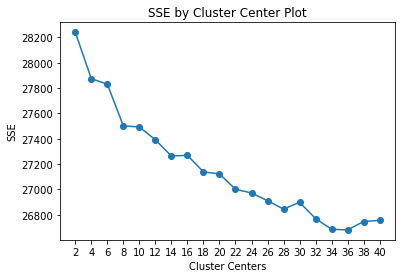

In [16]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 40)

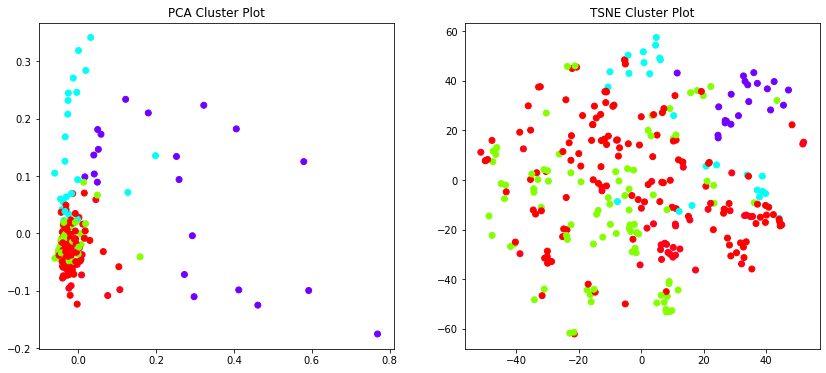

In [17]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
clusters = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
plot_tsne_pca(text, clusters)

In [18]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
cases,going,canceleverything,tomhanks,right,world,time,realdonaldtrump,update,pandemic

Cluster 1
going,know,stay,home,need,health,like,amp,just,people

Cluster 2
update,realdonaldtrump,fordays,pandemic,president,ban,uk,travel,europe,trump

Cluster 3
wife,pandemic,tested,suspended,rita,positive,season,hanks,tom,nba

Cluster 4
tomhanks,people,just,like,usa,trump,realdonaldtrump,update,pandemic,outbreak
